In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('../datasets/netflix_customer_churn.csv')
datos.head(5)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [4]:
#Eliminacion filas duplicadas
datos = datos.drop_duplicates()

In [5]:
#Eliminacion de nulos
datos = datos.replace(["", " ", "NA", "N/A"], np.nan)

In [6]:
#verificar si hay valores nulos
datos.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [7]:
#separar columnas numericas y categoricas
numeric_cols = datos.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = datos.select_dtypes(include="object").columns

In [8]:
#coumnas numericas -> mediana
for col in numeric_cols:
    datos[col] = datos[col].fillna(datos[col].median())

In [9]:
#columna categoricas -> moda
for col in categorical_cols:
    datos[col] = datos[col].fillna(datos[col].mode()[0])

In [10]:
#cambiar categorical por category
datos[categorical_cols] = datos[categorical_cols].astype("category")

In [11]:
#verificacion final
datos.info()

datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customer_id             5000 non-null   category
 1   age                     5000 non-null   int64   
 2   gender                  5000 non-null   category
 3   subscription_type       5000 non-null   category
 4   watch_hours             5000 non-null   float64 
 5   last_login_days         5000 non-null   int64   
 6   region                  5000 non-null   category
 7   device                  5000 non-null   category
 8   monthly_fee             5000 non-null   float64 
 9   churned                 5000 non-null   int64   
 10  payment_method          5000 non-null   category
 11  number_of_profiles      5000 non-null   int64   
 12  avg_watch_time_per_day  5000 non-null   float64 
 13  favorite_genre          5000 non-null   category
dtypes: category(7), float64(

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [12]:
datos.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [13]:
categorical_cols[1:]

Index(['gender', 'subscription_type', 'region', 'device', 'payment_method',
       'favorite_genre'],
      dtype='object')

In [14]:
def graficar_categoricas(df,categorias:list):
    rows = len(categorias)
    cols = len(df['churned'].unique())

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
    fig.suptitle('Comportamiento de variables categóricas', fontsize=16)

    label_colors = {
    'Male': '#16537e',
    'Female': '#ff8383',
    'Si': '#66bb6a',  # green
    'No': '#ef5350',  # red
    'Basic': '#e69138',
    'Premium': '#6aa84f',
    'Standard': '#ff0054',
    'Oceania': "#a8dadc",  # Pale cyan
    'Asia': "#f7ede2",  # Cream
    'Africa': '#33FF33', # Verde puro
    'North America': '#338DFF',
    'Tablet': '#2E2E2E', # Gris oscuro
    'TV': "#f5cac3",  # Blush pink
    'Laptop':"#84a59d",  # Muted green
    'Europe': '#48aac0',
    'Mobile': '#3eb99d',
    'Crypto': '#FF5733', # Rojo anaranjado
    'Credit Card': '#33FF57', # Verde brillante
    'Debit Card': '#338DFF', 
    'PayPal': '#FF33A8', # Rosa fuerte
    'Gift Card': '#A833FF', # Morado
    'Drama': '#33FFF3', # Turquesa
    'Sci-Fi': '#FFC733', # Amarillo
    'Comedy': '#FF8F33', # Naranja
    'Romance': '#8DFF33', # Verde menta
    'Action': '#338DFF', # Azul cielo
    'Horror': '#8D33FF', # Violeta
    'Documentary': '#FF3333' # Rojo puro
    }

    for i, col in enumerate(categorias):
      for j, status in enumerate(df['churned'].unique()):

        sub_df = df[df['churned'] == status]
        counts = sub_df[col].value_counts()
        labels = ['Si' if val == 1 else 'No' if val == 0
                  else str(val) for val in counts.index]
        colors = [label_colors.get(label, '#cccccc') for label in labels]  # Color Default
        axs[i, j].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors)
        axs[i, j].set_title(f'Cuentas {"activas" if status == 0 else "canceladas"} por {col.replace("_", " ").capitalize()}',
                            fontsize = 14)
        #axs[i, j].axis('equal')

    # Borra el espacio no usado
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    fig.tight_layout(rect=[0, 0.03, 1, 0.98])
    fig.show()

    #fig.savefig('/content/GraficasCategoricas.png',transparent=False, dpi = 300, bbox_inches = 'tight')

    return

def graficar_numericas(df,numericas:list):
  for col in numericas:

    if col == 'churned':
      continue

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    sns.boxplot(data=df, y=col, hue='churned',ax=axes[0])
    axes[0].set_title(f'Comparativa {col.replace("_", " ").capitalize()}',fontsize = 12)
    axes[0].legend(['Activas', 'Canceladas'],title='Cuentas', loc='upper left', bbox_to_anchor=(1, 1))

    sns.kdeplot(data=df[df['churned'] == 0], x=col, label='Activas', fill=True, ax=axes[1])
    sns.kdeplot(data=df[df['churned'] == 1], x=col, label='Canceladas', fill=True, ax=axes[1])
    axes[1].set_title(f'KDE de {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Densidad')
    axes[1].legend()


    plt.tight_layout()
    plt.show()

  #fig.suptitle('Comportamiento de variables numericas', fontsize=16)

  #fig.savefig('/content/GraficasCategoricas.png',transparent=False, dpi = 300, bbox_inches = 'tight')

  return

C:\Users\semma\AppData\Local\Temp\ipykernel_19896\1966949103.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


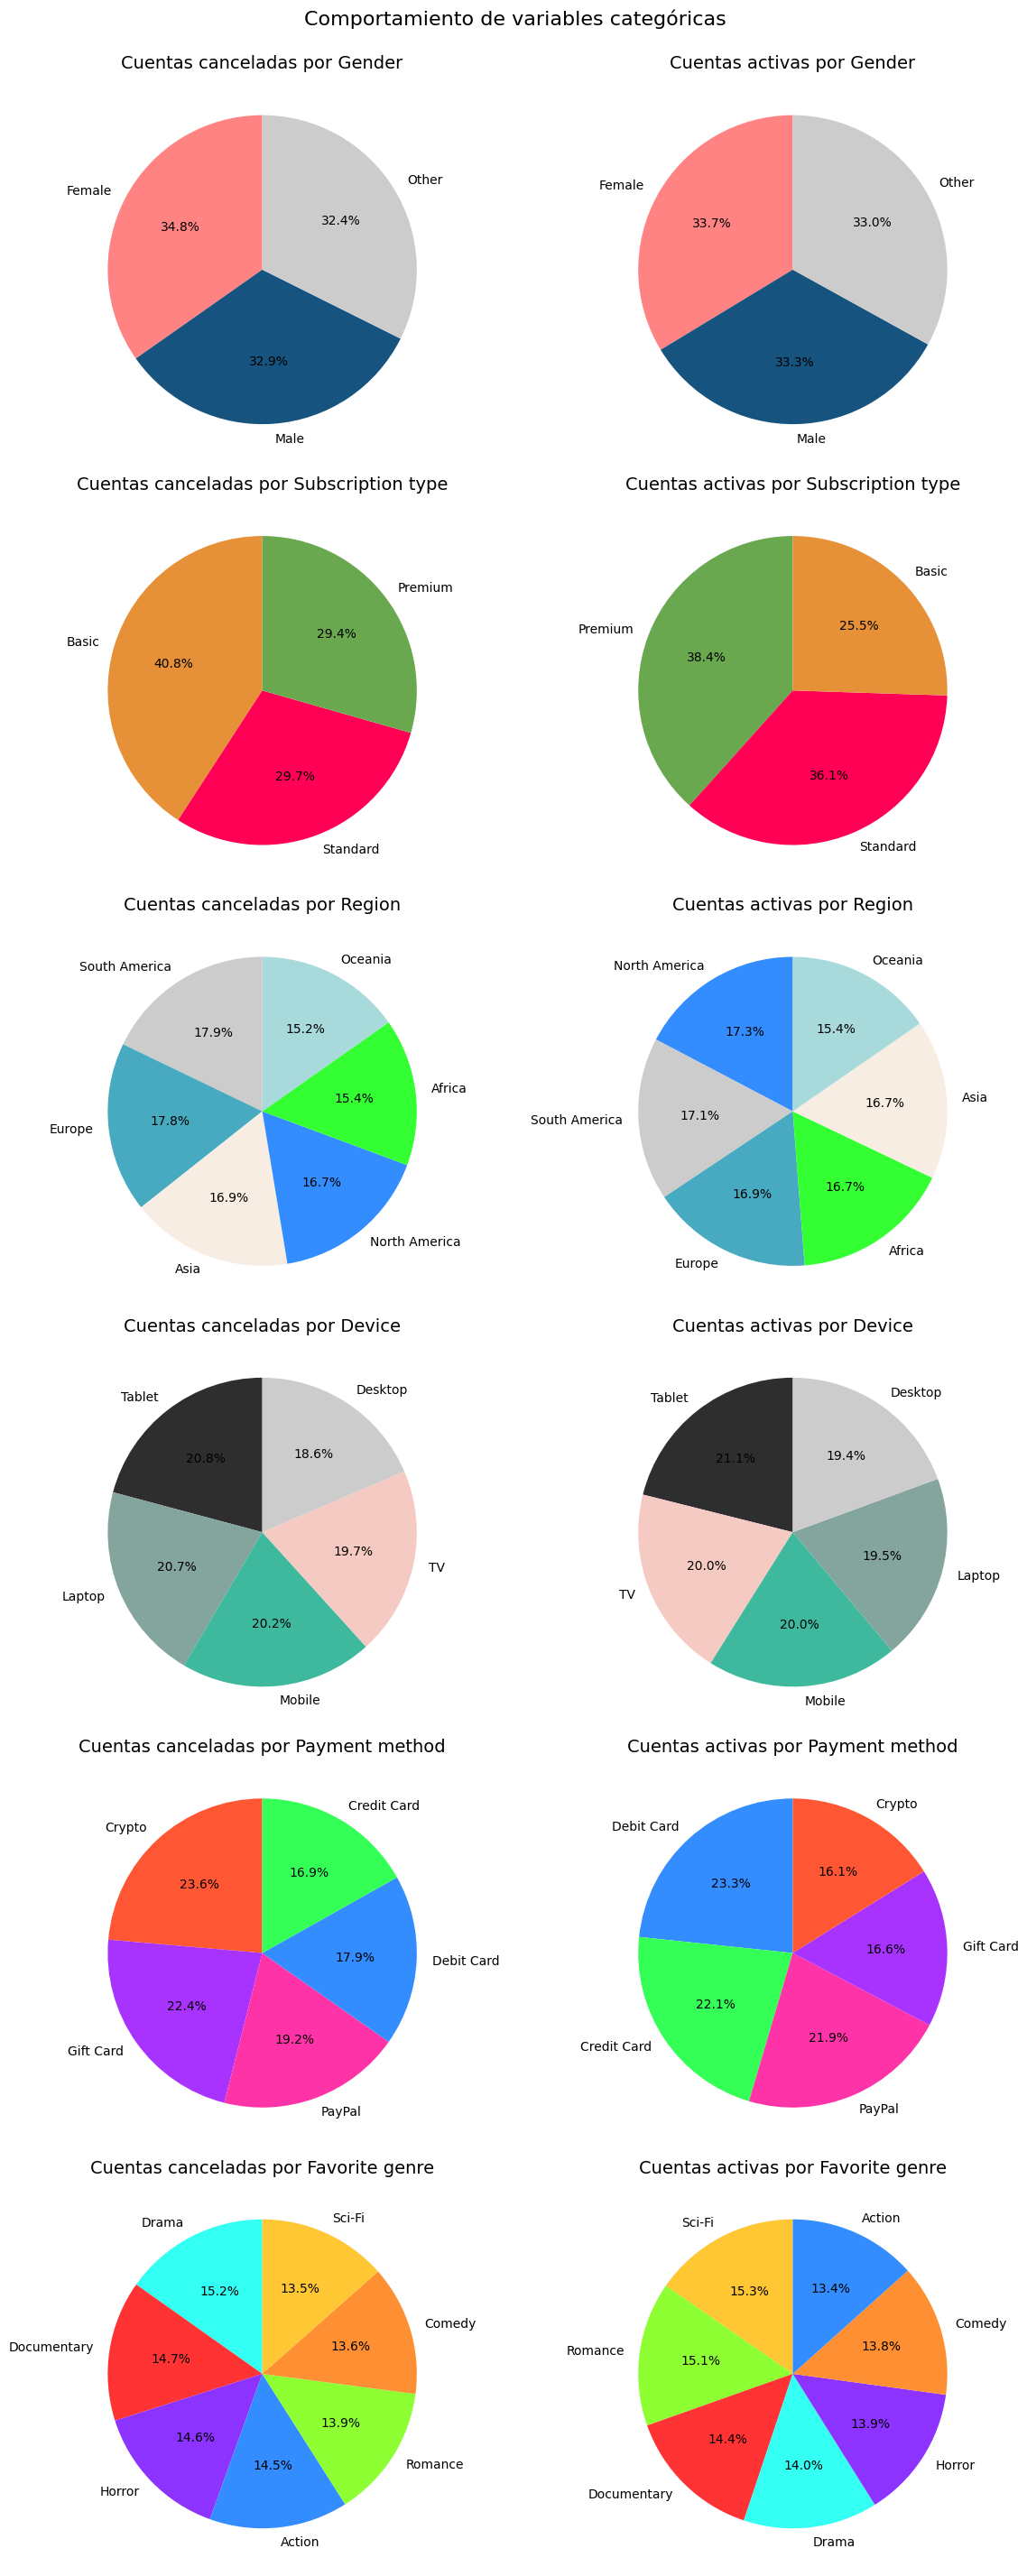

In [15]:
graficar_categoricas(datos,categorical_cols[1:])

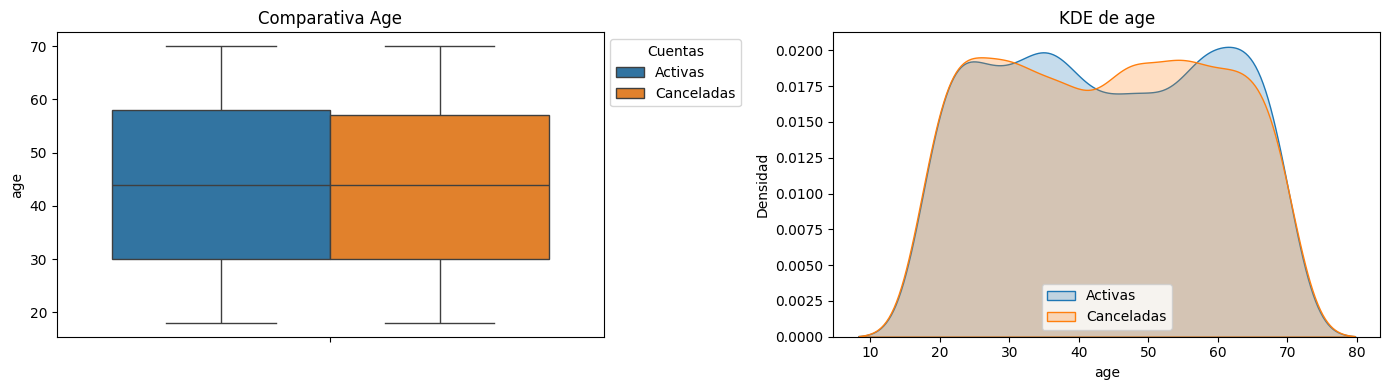

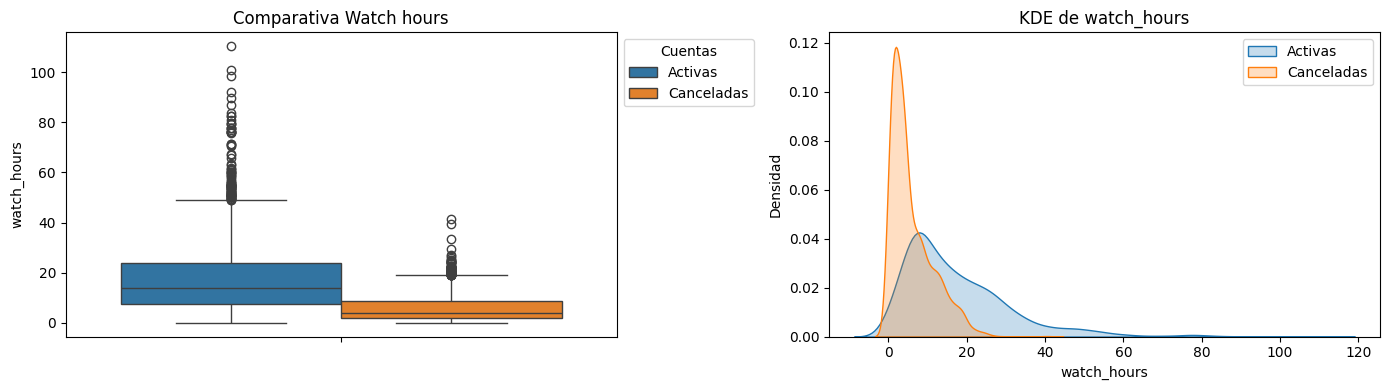

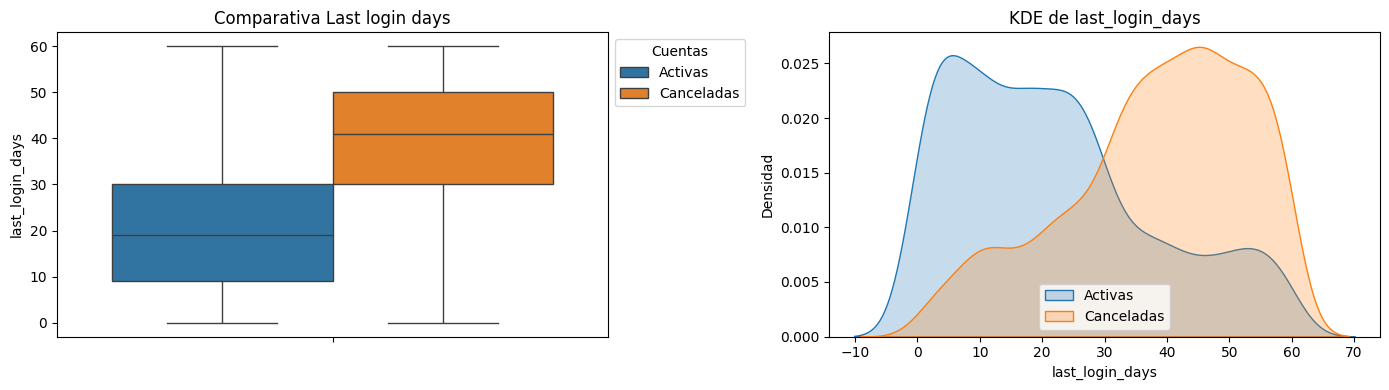

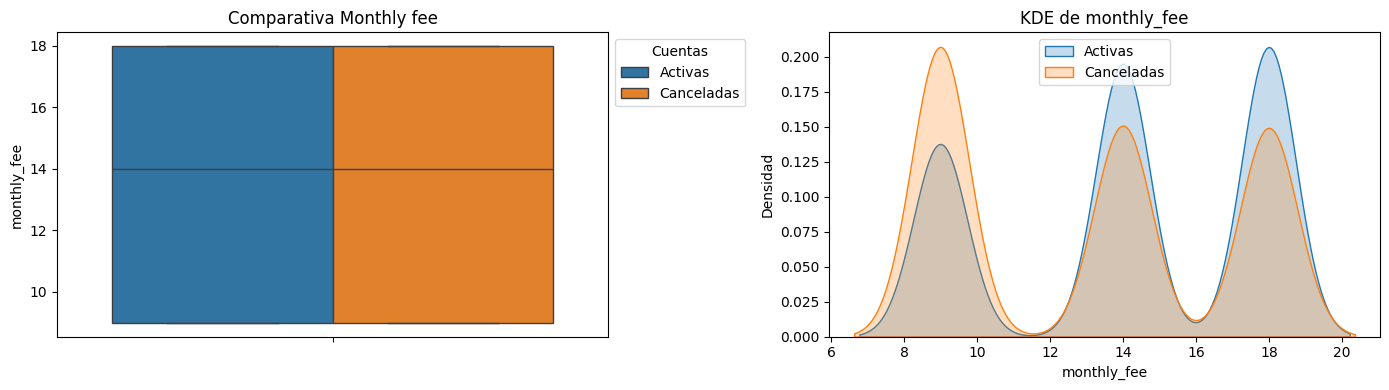

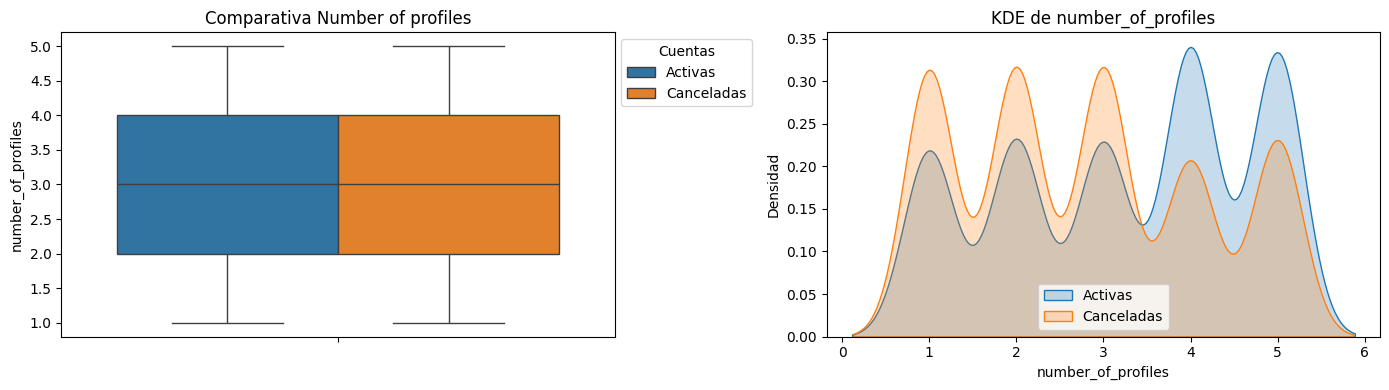

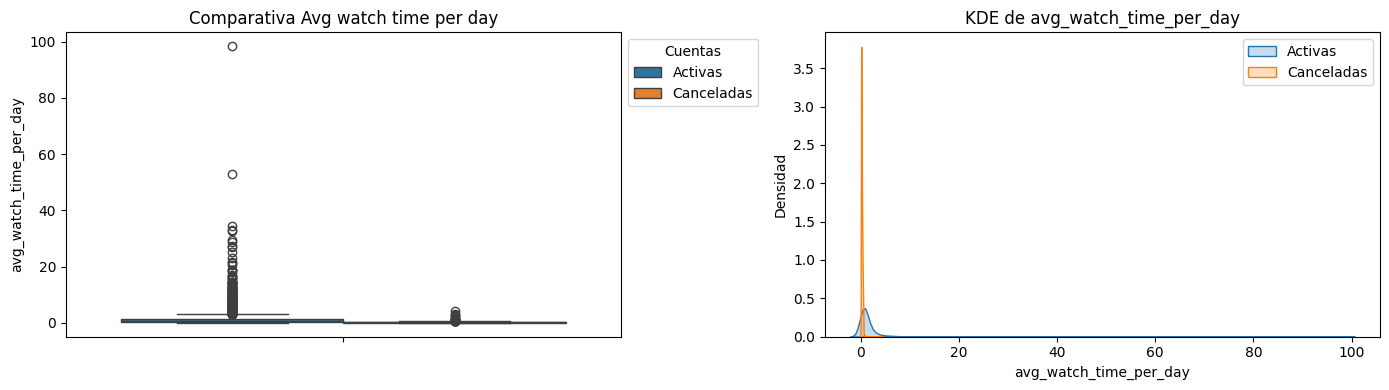

In [17]:
graficar_numericas(datos,numeric_cols)

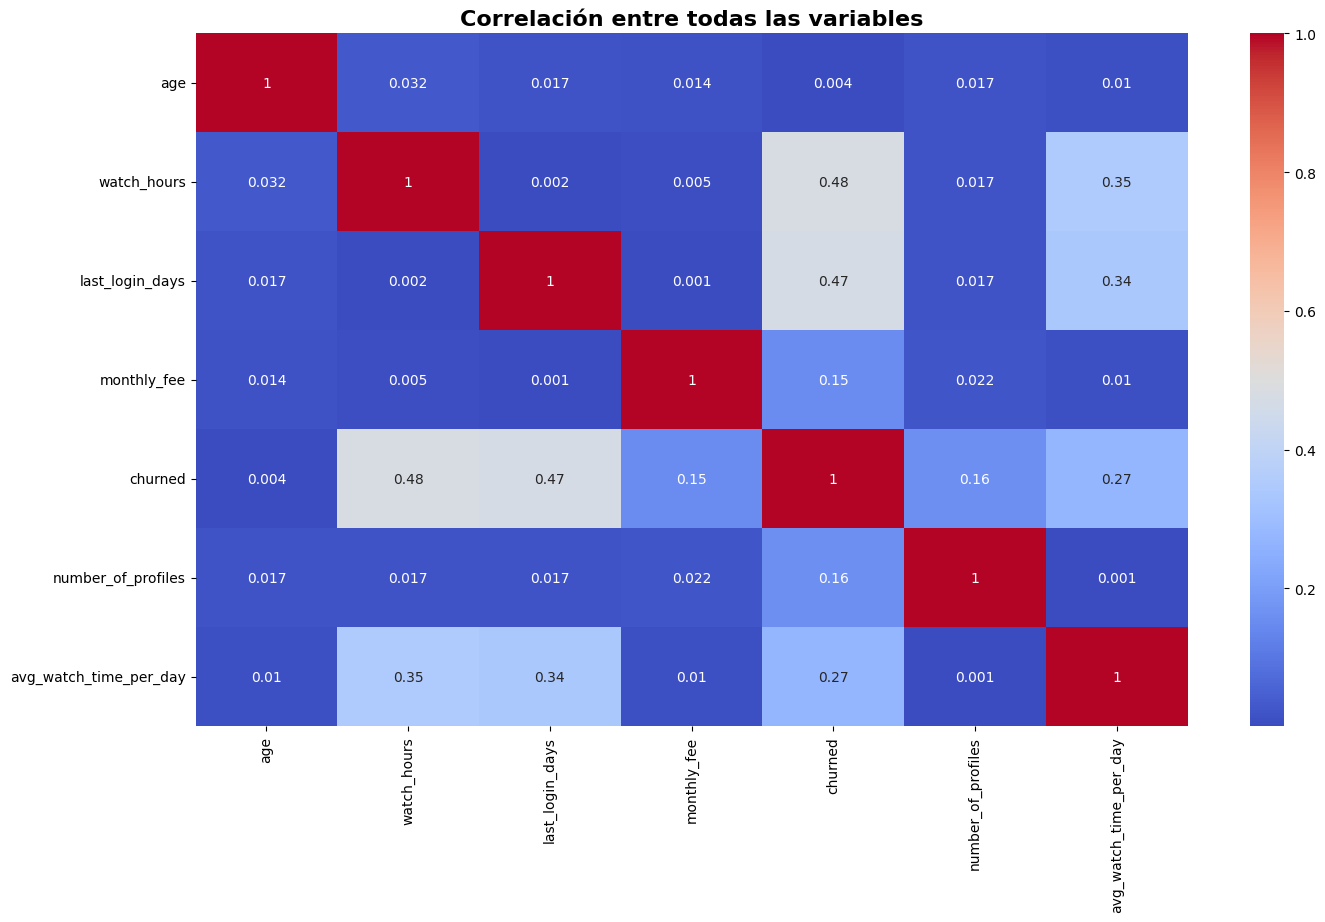

In [18]:
#Correlacion entre variables numericas
plt.figure(figsize=(16,9))
sns.heatmap(datos.corr(numeric_only=True).round(3).abs(), annot=True, cmap="coolwarm")
plt.title("Correlación entre todas las variables", fontsize=16, weight='bold', ha='center')
plt.show()

In [19]:
#Eliminacion de columnas irrelevantes
datos_originales = datos.drop(columns=['customer_id'])
datos_originales.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


## Seleccion de variables
customer_id Es meramente el identificador de cada registro por lo que no aporta informacion util 

Se realizara el entrenamiento del modelo utilizando todas las variables con el  fil de crear una metrica "base"  

<Axes: title={'center': 'Distribución de monthly_fee por subscription_type'}, xlabel='subscription_type', ylabel='monthly_fee'>

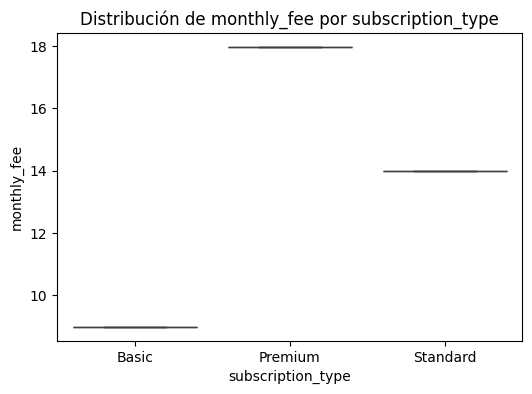

In [20]:
# Creamos un boxplot para visualizar la distribucion de monthly_fee por subscription_type
# de esta forma podemos confirmar que cada tipo de suscripcion tiene un valor unico
# traduciendose en que ambas variables aportan la misma informacion al modelo.
plt.figure(figsize=(6,4))
plt.title('Distribución de monthly_fee por subscription_type', fontsize=12)
sns.boxplot(data=datos, x='subscription_type', y='monthly_fee')

In [21]:
#Creacion del DF modificado eliminando columnas irrelevantes
datos_modificados = datos.drop(columns=['customer_id', 'age', 'gender', 'subscription_type',
                                           'region', 'device','payment_method','favorite_genre'])
datos_modificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   watch_hours             5000 non-null   float64
 1   last_login_days         5000 non-null   int64  
 2   monthly_fee             5000 non-null   float64
 3   churned                 5000 non-null   int64  
 4   number_of_profiles      5000 non-null   int64  
 5   avg_watch_time_per_day  5000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 234.5 KB


In [22]:
#Se extraen las columnas numericas y categoricas 
col_num_org = datos_originales.select_dtypes(include=["int64", "float64"]).columns
col_cat_org = datos_originales.select_dtypes(include="category").columns
col_num_mod = datos_modificados.select_dtypes(include=["int64", "float64"]).columns
col_cat_mod = datos_modificados.select_dtypes(include="category").columns

In [23]:
#Importar recursos para el OHE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [24]:
#Creacion del OHE
OHE_org = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False),col_cat_org),
    remainder='passthrough')
OHE_mod = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False),col_cat_mod),
    remainder='passthrough')
#Se aplica el OHE a los datos originales
encode_ohe_org = OHE_org.fit_transform(datos_originales)
encode_ohe_mod = OHE_mod.fit_transform(datos_modificados)
#lista_de_columnas = OHE.get_feature_names_out()
datos_enc_originales = pd.DataFrame(encode_ohe_org, columns = OHE_org.get_feature_names_out())
datos_enc_modificado = pd.DataFrame(encode_ohe_mod, columns = OHE_mod.get_feature_names_out())

In [25]:
# Correlacion de las variables con la objetivo
corr_churn = datos_enc_originales.corr()['remainder__churned'].round(3).abs().sort_values(ascending=False)
corr_churn[:]

remainder__churned                           1.000
remainder__watch_hours                       0.480
remainder__last_login_days                   0.472
remainder__avg_watch_time_per_day            0.273
onehotencoder__subscription_type_Basic       0.163
remainder__number_of_profiles                0.159
remainder__monthly_fee                       0.152
onehotencoder__subscription_type_Premium     0.094
onehotencoder__payment_method_Crypto         0.094
onehotencoder__payment_method_Gift Card      0.074
onehotencoder__subscription_type_Standard    0.068
onehotencoder__payment_method_Debit Card     0.067
onehotencoder__payment_method_Credit Card    0.066
onehotencoder__payment_method_PayPal         0.033
onehotencoder__favorite_genre_Sci-Fi         0.026
onehotencoder__favorite_genre_Action         0.017
onehotencoder__favorite_genre_Romance        0.017
onehotencoder__region_Africa                 0.017
onehotencoder__favorite_genre_Drama          0.016
onehotencoder__device_Laptop   

In [26]:
#Impoartar recursos para la separacion de datos
from sklearn.model_selection import train_test_split

In [27]:
#Seleccion de las variables para entrenar apartir de los datos original
X_org = datos_enc_originales.drop(columns='remainder__churned')
y_org = datos_enc_originales.remainder__churned
#Separacion del 20% de los datos originales
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X_org, y_org, test_size=0.2, random_state=100)
#Seleccion de las variables para entrenar apartir de los datos modificados
X_mod = datos_enc_modificado.drop(columns='remainder__churned')
y_mod = datos_enc_modificado.remainder__churned
#Separacion del 20% de los datos modificados
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_mod, y_mod, test_size=0.2, random_state=100)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
#Creacion del preprocesador
from sklearn.compose import ColumnTransformer
preprocessor_org = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_num_org),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_cat_org)
    ]
)
preprocessor_mod = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_num_mod),
        ('cat', OneHotEncoder(handle_unknown='ignore'), col_cat_mod)
    ]
)
#Creacion del pipeline para el modelo
pipe_base = Pipeline([
    #('prep', preprocessor_org),
    ('scaler', StandardScaler()),
    ('knn', KNN())
])
pipe_modificado = Pipeline([
    ('prep', preprocessor_mod),
    ('scaler', StandardScaler()),
    ('knn', KNN())
])    

In [30]:

# Definimos el metodo de validacion cruzada 
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
# Ajuste de hiperparametros con GridSearchCV
param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski'],
    'knn__p': [1, 2]
}
# Creacion de los modelos con GridSearchCV
# Dado que se busca detectar la mayor cantidad de churned = 1, se utiliza RECALL como métrica principal.
# aceptando errar un poco con falsos positivos 
modelo_base = GridSearchCV(
    estimator=pipe_base,
    param_grid=param_grid,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
modelo_modificado = GridSearchCV(
    estimator=pipe_modificado,
    param_grid=param_grid,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)


In [31]:

modelo_base.fit(X_train_org, y_train_org)
print("Best parameters:", modelo_base.best_params_)
print("Best CV score:", modelo_base.best_score_)
best_model_base = modelo_base.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance'}
Best CV score: 0.8539147869674185


In [36]:

modelo_modificado.fit(X_train_mod, y_train_mod)
print("Best parameters:", modelo_modificado.best_params_)
print("Best CV score:", modelo_modificado.best_score_)
best_model_modificado = modelo_modificado.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'uniform'}
Best CV score: 0.9254636591478697


In [37]:
#Predicciones de los modelos
y_pred_base = best_model_base.predict(X_test_org)
y_pred_mod = best_model_modificado.predict(X_test_mod)

In [38]:
#Importacion librerias para la evaluacion del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

In [39]:
#Crearemos las funciones con las cuales evaluaremos los modelos
def evaluar_modelo(y_test, y_pred):
  matriz_confusion = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred))
  print(f"Matriz de confusion\n{matriz_confusion}")
  print('-'*100)

In [40]:
evaluar_modelo(y_test_org, y_pred_base)
evaluar_modelo(y_test_mod, y_pred_mod)

              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75       484
         1.0       0.74      0.86      0.80       516

    accuracy                           0.78      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.78      0.77      1000

Matriz de confusion
[[332 152]
 [ 73 443]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       484
         1.0       0.92      0.91      0.91       516

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

Matriz de confusion
[[444  40]
 [ 49 467]]
----------------------------------------------------------------------------------------------------


In [48]:
# Se calcula la importancia de las variables mediante permutación
imp_base = permutation_importance(
    best_model_base,
    X_train_org,
    y_train_org,
    n_repeats=10,
    random_state=42,
    scoring='recall'
)
imp_mod = permutation_importance(
    best_model_modificado,
    X_train_mod,
    y_train_mod,
    n_repeats=10,
    random_state=42,
    scoring='recall'
)


In [50]:
importance_df = pd.DataFrame({
    'feature': X_train_org.columns,
    'importance_mean': imp_base.importances_mean,
    'importance_std': imp_base.importances_std
}).sort_values(by='importance_mean', ascending=False)
importance_df

,feature,importance_mean,importance_std
31,remainder__last_login_days,0.042671,0.002648
30,remainder__watch_hours,0.028264,0.003275
33,remainder__number_of_profiles,0.021261,0.003609
2,onehotencoder__gender_Other,0.015058,0.001387
20,onehotencoder__payment_method_Gift Card,0.015008,0.001266
1,onehotencoder__gender_Male,0.014907,0.001909
18,onehotencoder__payment_method_Crypto,0.014557,0.001768
0,onehotencoder__gender_Female,0.014007,0.001776
26,onehotencoder__favorite_genre_Horror,0.013707,0.001707
10,onehotencoder__region_Oceania,0.013607,0.001497


In [51]:
importance_df = pd.DataFrame({
    'feature': X_train_mod.columns,
    'importance_mean': imp_mod.importances_mean,
    'importance_std': imp_mod.importances_std
}).sort_values(by='importance_mean', ascending=False)
importance_df

,feature,importance_mean,importance_std
0,remainder__watch_hours,0.230715,0.006609
1,remainder__last_login_days,0.188144,0.007898
3,remainder__number_of_profiles,0.063982,0.005292
2,remainder__monthly_fee,0.048024,0.003964
4,remainder__avg_watch_time_per_day,0.016908,0.002645
